In [168]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time
import pandas as pd
from selenium.webdriver.support.ui import Select
from webdriver_manager.chrome import ChromeDriverManager
import re
import plotly.express as px
import plotly.graph_objects as go

In [40]:
opciones=Options()

opciones.add_experimental_option('excludeSwitches', ['enable-automation'])
opciones.add_experimental_option('useAutomationExtension', False)

opciones.headless=False    # si True, no aperece la ventana (headless=no visible)

opciones.add_argument('--start-maximized')         # comienza maximizado

#opciones.add_argument('user-data-dir=selenium')    # mantiene las cookies

#opciones.add_extension('driver_folder/adblock.crx')       # adblocker

opciones.add_argument('--incognito')     

In [41]:
driver = "./chromedriver.exe"
driver = webdriver.Chrome(driver, options = opciones)

<ipython-input-41-7612bc59572c>:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(driver, options = opciones)


In [42]:
url = "https://kavehome.com/es/es/"
driver.get(url)
driver.implicitly_wait(2)
driver.find_element_by_css_selector("#onetrust-accept-btn-handler").click()
driver.implicitly_wait(2)
driver.find_element_by_css_selector("#main > div.home-categories-menu.dark > a:nth-child(1) > div > span").click()

descripcion = [] 
precio = []
nombre = []
for i in range (0,48):
        descripcion.append(driver.find_element_by_xpath(f"/html/body/div[1]/main/section/div[4]/div[1]/div[2]/div[1]/ul/li[{i+1}]/a/div[2]/div/h3").text)#pongo i+1 porque el primer elemento es 1, en lugar de 0
        nombre.append(driver.find_element_by_xpath(f"/html/body/div[1]/main/section/div[4]/div[1]/div[2]/div[1]/ul/li[{i+1}]/a/div[2]/div/div/span").text)
        entero = driver.find_element_by_xpath(f"/html/body/div[1]/main/section/div[4]/div[1]/div[2]/div[1]/ul/li[{i+1}]/a/div[2]/div/div/div/div/span[1]").text #como el xpath del entero y de la parte entera del decimal
        try:
            decimal = driver.find_element_by_xpath(f"/html/body/div[1]/main/section/div[4]/div[1]/div[2]/div[1]/ul/li[{i+1}]/a/div[2]/div/div/div/div/span[2]").text
            precio.append([entero,decimal])
        except:
            
            precio.append(entero)
            
driver.quit()

<ipython-input-42-1f143b1e6afa>:4: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_css_selector("#onetrust-accept-btn-handler").click()
<ipython-input-42-1f143b1e6afa>:6: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_css_selector("#main > div.home-categories-menu.dark > a:nth-child(1) > div > span").click()
<ipython-input-42-1f143b1e6afa>:12: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  descripcion.append(driver.find_element_by_xpath(f"/html/body/div[1]/main/section/div[4]/div[1]/div[2]/div[1]/ul/li[{i+1}]/a/div[2]/div/h3").text)#pongo i+1 porque el primer elemento es 1, en lugar de 0
<ipython-input-42-1f143b1e6afa>:13: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  nombre.append(driver.find_element_by_xpath(f"/html/body/div[1]/main/s

In [43]:
precio

[['70', ',95'],
 ['120', ',70'],
 ['74', ',75'],
 ['126', ',65'],
 ['109', ',65'],
 ['199', '€'],
 ['89', ',60'],
 ['122', '€'],
 ['135', '€'],
 ['107', ',95'],
 ['149', '€'],
 ['155', '€'],
 ['188', ',70'],
 ['149', '€'],
 ['155', '€'],
 ['199', '€'],
 ['122', '€'],
 ['175', '€'],
 ['124', '€'],
 ['149', '€'],
 ['119', '€'],
 ['149', '€'],
 ['87', ',20'],
 ['128', ',25'],
 ['175', '€'],
 ['169', '€'],
 ['83', ',85'],
 ['149', '€'],
 ['108', '€'],
 ['89', ',60'],
 ['155', '€'],
 ['149', '€'],
 ['109', ',80'],
 ['149', '€'],
 ['169', '€'],
 ['199', '€'],
 ['87', ',50'],
 ['185', '€'],
 ['155', '€'],
 ['124', '€'],
 ['128', ',25'],
 ['199', '€'],
 ['59', ',99'],
 ['108', '€'],
 ['199', '€'],
 ['116', ',10'],
 ['84', ',99'],
 ['59', ',99']]

In [57]:
precio1 = []
for i in precio:
    print(i[0])
    print(i[-1])
    

70
,95
120
,70
74
,75
126
,65
109
,65
199
€
89
,60
122
€
135
€
107
,95
149
€
155
€
188
,70
149
€
155
€
199
€
122
€
175
€
124
€
149
€
119
€
149
€
87
,20
128
,25
175
€
169
€
83
,85
149
€
108
€
89
,60
155
€
149
€
109
,80
149
€
169
€
199
€
87
,50
185
€
155
€
124
€
128
,25
199
€
59
,99
108
€
199
€
116
,10
84
,99
59
,99


In [58]:
precio1 = []
for i in precio:
    precio1.append(i[0] + i[-1])

In [59]:
precio1

['70,95',
 '120,70',
 '74,75',
 '126,65',
 '109,65',
 '199€',
 '89,60',
 '122€',
 '135€',
 '107,95',
 '149€',
 '155€',
 '188,70',
 '149€',
 '155€',
 '199€',
 '122€',
 '175€',
 '124€',
 '149€',
 '119€',
 '149€',
 '87,20',
 '128,25',
 '175€',
 '169€',
 '83,85',
 '149€',
 '108€',
 '89,60',
 '155€',
 '149€',
 '109,80',
 '149€',
 '169€',
 '199€',
 '87,50',
 '185€',
 '155€',
 '124€',
 '128,25',
 '199€',
 '59,99',
 '108€',
 '199€',
 '116,10',
 '84,99',
 '59,99']

In [74]:
lista = []
for i in precio1:
    try:
        lista.append(float(i.replace("€", "").replace(",", '.')))
    except:
        lista.append(float(i.replace(",", '.')))

In [75]:
df_precio = pd.DataFrame(lista)

In [76]:
df_precio.head(7)

,0
0,70.95
1,120.70
2,74.75
3,126.65
4,109.65
5,199.00
6,89.60


In [50]:
df_nombre = pd.DataFrame(nombre)

In [56]:
df_nombre.head()

,0
0,Naiquen
1,Nadya
2,Oyaka
3,Runnie
4,Lumina


In [52]:
df_descripcion = pd.DataFrame(descripcion)

In [54]:
df_descripcion.head()

,0
0,Silla Naiquen gris claro
1,Silla Nadya gris oscuro
2,Silla Oyaka chapa de nogal y acero con detalle...
3,Silla Runnie gris oscuro con patas de acero ac...
4,Silla Lumina gris oscuro patas acero acabado d...


In [5]:
#nombres
#/html/body/div[1]/main/section/div[4]/div[1]/div[2]/div[1]/ul/li[1]/a/div[2]/div/div/span
#/html/body/div[1]/main/section/div[4]/div[1]/div[2]/div[1]/ul/li[2]/a/div[2]/div/div/span

In [6]:
descripcion

['Silla Nadya gris oscuro',
 'Silla Oyaka chapa de nogal y acero con detalle cobre',
 'Silla Runnie gris oscuro con patas de acero acabado pintado negro',
 'Silla Lumina gris oscuro patas acero acabado dorado',
 'Silla Runnie de chenilla beige con patas de acero con acabado dorado',
 'Silla Alve gris claro',
 'Silla Suanne de pana gruesa verde oscuro con patas de acero acabado pintado negro',
 'Silla Mael gris oscuro y patas de acero con acabado negro',
 'Silla Adam gris oscuro',
 'Silla Ciselia de borrego blanco y metal negro',
 'Silla Konna de chenilla beige con patas de acero con acabado pintado negro',
 'Silla Yvette terciopelo gris',
 'Silla Aniela de borrego blanco y metal con acabado negro',
 'Silla Konna de pana gruesa verde oscuro con patas de acero acabado pintado negro',
 'Silla Runnie de chenilla gris oscuro con patas de acero con acabado dorado',
 'Silla Suanne de pana gruesa gris con patas de acero acabado pintado negro',
 'Silla Konna beige patas de madera maciza de fres

In [78]:
nombre

['Naiquen',
 'Nadya',
 'Oyaka',
 'Runnie',
 'Lumina',
 'Runnie',
 'Alve',
 'Suanne',
 'Mael',
 'Adam',
 'Ciselia',
 'Konna',
 'Yvette',
 'Aniela',
 'Konna',
 'Runnie',
 'Suanne',
 'Konna',
 'Einara',
 'Aniela',
 'Suanne',
 'Runnie',
 'Milian',
 'Madge',
 'Konna',
 'Amira',
 'Naiquen',
 'Maureen',
 'Benilda',
 'Alve',
 'Konna',
 'Aniela',
 'Lumina',
 'Ciselia',
 'Amira',
 'Konna',
 'Melva',
 'Runnie',
 'Konna',
 'Einara',
 'Madge',
 'Runnie',
 'Yaren',
 'Benilda',
 'Konna',
 'Lumina',
 'Ivonne',
 'Yaren']

In [17]:
driver.quit()

In [102]:
df = pd.DataFrame(nombre,descripcion).reset_index()

In [103]:
df.head()

,index,0
0,Silla Naiquen gris claro,Naiquen
1,Silla Nadya gris oscuro,Nadya
2,Silla Oyaka chapa de nogal y acero con detalle...,Oyaka
3,Silla Runnie gris oscuro con patas de acero ac...,Runnie
4,Silla Lumina gris oscuro patas acero acabado d...,Lumina


In [104]:
diccio = {"index":"Descripcion", 0:"Nombre silla"}

In [105]:
df.rename(columns=diccio,inplace=True)

In [107]:
df.head()

,Descripcion,Nombre silla
0,Silla Naiquen gris claro,Naiquen
1,Silla Nadya gris oscuro,Nadya
2,Silla Oyaka chapa de nogal y acero con detalle...,Oyaka
3,Silla Runnie gris oscuro con patas de acero ac...,Runnie
4,Silla Lumina gris oscuro patas acero acabado d...,Lumina


In [108]:
df_final = pd.concat([df, df_precio], axis=1)

In [110]:
df_final.head()

,Descripcion,Nombre silla,0
0,Silla Naiquen gris claro,Naiquen,70.95
1,Silla Nadya gris oscuro,Nadya,120.70
2,Silla Oyaka chapa de nogal y acero con detalle...,Oyaka,74.75
3,Silla Runnie gris oscuro con patas de acero ac...,Runnie,126.65
4,Silla Lumina gris oscuro patas acero acabado d...,Lumina,109.65


In [113]:
diccio2 = {0:"Precio"}
df_final.rename(columns=diccio2,inplace=True)

In [114]:
df_final

,Descripcion,Nombre silla,Precio
0,Silla Naiquen gris claro,Naiquen,70.95
1,Silla Nadya gris oscuro,Nadya,120.70
2,Silla Oyaka chapa de nogal y acero con detalle...,Oyaka,74.75
3,Silla Runnie gris oscuro con patas de acero ac...,Runnie,126.65
4,Silla Lumina gris oscuro patas acero acabado d...,Lumina,109.65
5,Silla Runnie de chenilla beige con patas de ac...,Runnie,199.00
6,Silla Alve gris claro,Alve,89.60
7,Silla Suanne de pana gruesa verde oscuro con p...,Suanne,122.00
8,Silla Mael gris oscuro y patas de acero con ac...,Mael,135.00
9,Silla Adam gris oscuro,Adam,107.95


In [117]:
df_final.to_csv("sillas.csv") #lo guardo diréactamente en la misma carpeta del jupyter de limpieza

In [119]:
kave = pd.read_csv('sillas.csv', index_col=0)

### Procedemos a la visualización

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [125]:
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

### 1. Voy a comprobar si existe alguna silla con valor superior a 300€

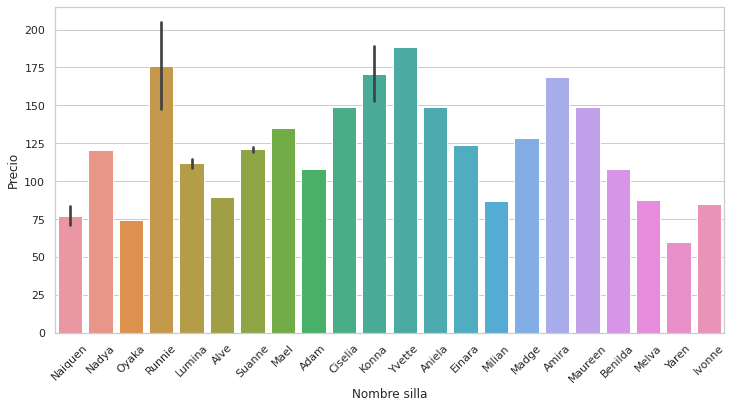

In [127]:
barplot = sns.barplot(x="Nombre silla", y="Precio", data=df_final,ci="sd");
plt.xticks(rotation=45);

In [186]:
barplot.figure.savefig("barplot.jpg", dpi=1000, bbox_inches ="tight")

### El precio más alto de silla no supera los 300€

### 2. Además visualizaré el precio medio de las sillas de esta marca

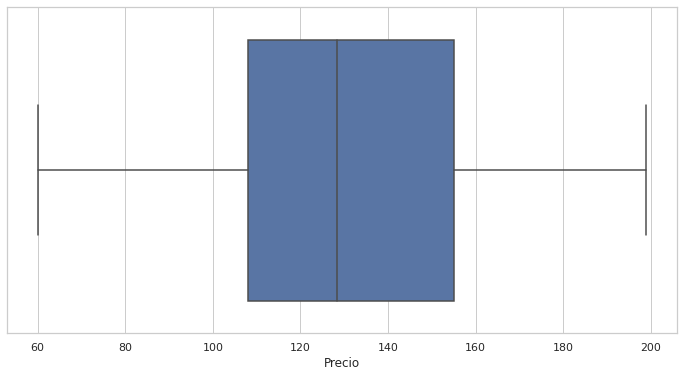

In [183]:
media = sns.boxplot(x="Precio", data=df_final)

In [184]:
media.figure.savefig("media.jpg", dpi=1000, bbox_inches ="tight")

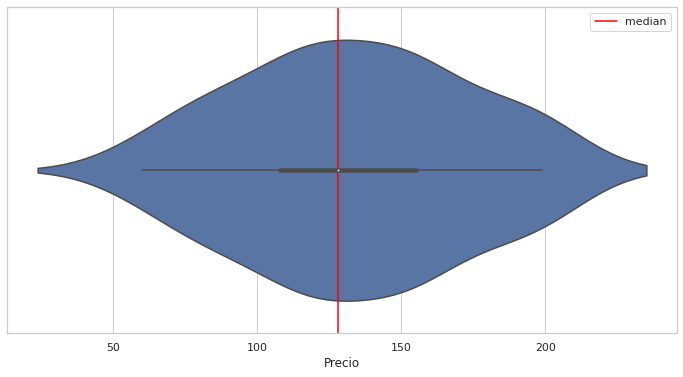

In [185]:
violin = sns.violinplot(x=df_final.Precio)
violin_precio = violin.axvline(x=df_final.Precio.median(), c="red", label="median")
plt.legend()

In [181]:
violin_precio.figure.savefig("violin.jpg", dpi=1000, bbox_inches ="tight")

### El precio medio de las sillas de esta marca ronda los 130€

### 3. Vamos a comprobar que en esta marca existen más sillas de color gris que de color verde

In [161]:
def limpiar_sillas(x):
    dicc_descripcion = {
            "Silla gris":re.search(".*[Gg](ris|RIS).*",str(x)),
            "Silla verde":re.search(".*[Vv](erde|ERDE).*",str(x)),
            "Silla azul":re.search(".*[Aa](zul|ZUL).*",str(x)),
            "Silla negro":re.search(".*[Nn](egro|EGRO).*",str(x)),
            "Silla rosa":re.search(".*[Rr](osa|OSA).*",str(x))}

    for key,values in dicc_descripcion.items():
        if values:
            return key

    return "otro color"

In [162]:
df_final["Color"]=df_final["Descripcion"].apply(limpiar_sillas)

In [174]:
df_final.head()

,Descripcion,Nombre silla,Precio,Color
0,Silla Naiquen gris claro,Naiquen,70.95,Silla gris
1,Silla Nadya gris oscuro,Nadya,120.70,Silla gris
2,Silla Oyaka chapa de nogal y acero con detalle...,Oyaka,74.75,otro color
3,Silla Runnie gris oscuro con patas de acero ac...,Runnie,126.65,Silla gris
4,Silla Lumina gris oscuro patas acero acabado d...,Lumina,109.65,Silla gris


In [171]:
color = df_final["Color"].value_counts()
color

Silla gris     23
Silla negro    10
otro color      6
Silla verde     6
Silla azul      2
Silla rosa      1
Name: Color, dtype: int64

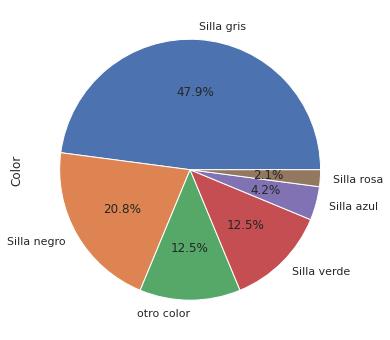

In [177]:
colores = color.plot.pie(autopct="%.1f%%")

In [178]:
colores.figure.savefig("colores.jpg", dpi=1000, bbox_inches ="tight")

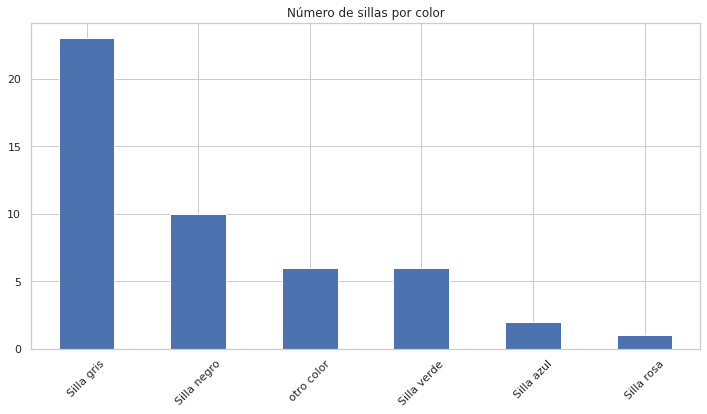

In [175]:
sillas_color = df_final["Color"].value_counts().plot(kind="bar", figsize=(12,6), title="Número de sillas por color")
plt.xticks(rotation=45);

In [176]:
sillas_color.figure.savefig("sillas_color.jpg", dpi=1000, bbox_inches ="tight")

### Efectivamente existen más sillas de color gris que de color verde

In [ ]:
#precios sin descuento
#/html/body/div[1]/main/section/div[4]/div[1]/div[2]/div[1]/ul/li[6]/a/div[2]/div/div/div/div/span[1]
#/html/body/div[1]/main/section/div[4]/div[1]/div[2]/div[1]/ul/li[8]/a/div[2]/div/div/div/div/span[1]#me cambia el número de posición de cada elemento--> ojo i+1

#precios con descuento
#/html/body/div[1]/main/section/div[4]/div[1]/div[2]/div[1]/ul/li[1]/a/div[2]/div/div/div/div
#/html/body/div[1]/main/section/div[4]/div[1]/div[2]/div[1]/ul/li[2]/a/div[2]/div/div/div/div
#/html/body/div[1]/main/section/div[4]/div[1]/div[2]/div[1]/ul/li[3]/a/div[2]/div/div/div/div#cambia la posición de cada producto



#precio del elemento 22, entero y ambas partes del decimal.
#/html/body/div[1]/main/section/div[4]/div[1]/div[2]/div[1]/ul/li[22]/a/div[2]/div/div/div/div
#/html/body/div[1]/main/section/div[4]/div[1]/div[2]/div[1]/ul/li[22]/a/div[2]/div/div/div/div/span[1]
#/html/body/div[1]/main/section/div[4]/div[1]/div[2]/div[1]/ul/li[22]/a/div[2]/div/div/div/div/span[2]


#precios con descuento con ambas partes del número decimal.
#precio decimal del elemnto 6
#/html/body/div[1]/main/section/div[4]/div[1]/div[2]/div[1]/ul/li[6]/a/div[2]/div/div/div/div/span[1]
#/html/body/div[1]/main/section/div[4]/div[1]/div[2]/div[1]/ul/li[6]/a/div[2]/div/div/div/div/span[2]

In [5]:
#PUEDE DARSE EL CASO DE QUE NO SIEMPRE SALTEN LAS COOKIES, ENTONCES HABRÍA QUE PONER UN TRY-EXCEPT COMO EL SIGUIENTE
#url = "https://kavehome.com/es/es/"
#driver.get(url)
#driver.implicitly_wait(2)
#try:
    driver.find_element_by_css_selector("#onetrust-accept-btn-handler").click()
    driver.implicitly_wait(2)
    driver.find_element_by_css_selector("#main > div.home-categories-menu.dark > a:nth-child(1) > div > span").click()
#except:
    driver.implicitly_wait(2)
    driver.find_element_by_css_selector("#main > div.home-categories-menu.dark > a:nth-child(1) > div > span").click()


<ipython-input-5-d8baba06ed7d>:5: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_css_selector("#onetrust-accept-btn-handler").click()
<ipython-input-5-d8baba06ed7d>:10: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_css_selector("#main > div.home-categories-menu.dark > a:nth-child(1) > div > span").click()
